In [86]:
"""Naive_Bayes.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1nOYJttlMOKaKQpFYUq5huFjlIrvG0lHt
"""
import sys
sys.path.append(".")
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
import datetime
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
from sisa import SISA
import os
from sklearn.model_selection import train_test_split

### I. Binary Classification with Purchase Dataset

In [87]:
pwd = os.path.dirname(os.path.realpath('sisa'))
train_data_b = np.load(os.path.join(pwd, 'purchase2_train.npy'), allow_pickle=True)
test_data_b = np.load(os.path.join(pwd, 'purchase2_test.npy'), allow_pickle=True)
train_data_b = train_data_b.reshape((1,))[0]
test_data_b = test_data_b.reshape((1,))[0]

In [88]:
X_train_b = train_data_b['X'].astype(np.float32)
X_train_b = X_train_b[0:5000]
X_test_b = test_data_b['X'].astype(np.float32)
X_test_b = X_test_b[0:2000]
y_train_b = train_data_b['y'].astype(np.int64)
y_train_b = y_train_b[0:5000]
y_test_b = test_data_b['y'].astype(np.int64)
y_test_b = y_test_b[0:2000]


### Experiment I BaseLine: Retraining model from scratch for every unlearning request

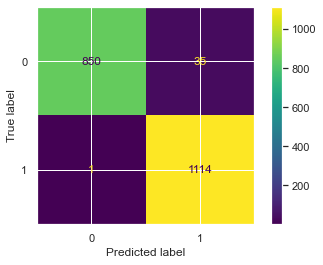

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 158768
Naive Bayes accuracy score: 0.982000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 36


In [150]:

 # 1000 Unlearning Requests
Cnb_1 = CategoricalNB()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
unlearn_req = []
N,D = X_train_copy_1.shape
start = datetime.datetime.now()
for i in range(1000):
    delete_row = np.random.choice(range(N), replace=False)
    X_train_copy_1 = np.delete(X_train_copy_1, delete_row, axis=0)
    y_train_copy_1 = np.delete(y_train_copy_1, delete_row, axis=0)
    Cnb_1.partial_fit(X_train_copy_1, y_train_copy_1, classes=np.unique(y_train_copy_1))
    N-=1

end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
new_data_20_x = X_train_copy_1
new_data_20_y = y_train_copy_1
y_pred = Cnb_1.predict(X_test_b)
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

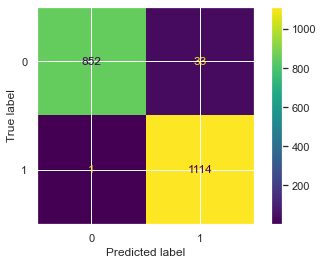

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 279911 ms
Naive Bayes accuracy score: 0.983000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 34


In [151]:

# 2000 Unlearning Requests
Cnb_1 = CategoricalNB()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
unlearn_req = []
N,D = X_train_copy_1.shape
start = datetime.datetime.now()
for i in range(2000):
    delete_row = np.random.choice(range(N), replace=False)
    X_train_copy_1 = np.delete(X_train_copy_1, delete_row, axis=0)
    y_train_copy_1 = np.delete(y_train_copy_1, delete_row, axis=0)
    Cnb_1.partial_fit(X_train_copy_1, y_train_copy_1, classes=np.unique(y_train_copy_1))
    N-=1
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
new_data_40_x = X_train_copy_1
new_data_40_y = y_train_copy_1
y_pred = Cnb_1.predict(X_test_b)
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

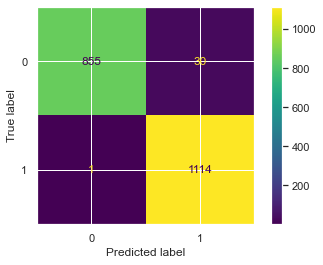

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       885
           1       0.97      1.00      0.99      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 376457 ms
Naive Bayes accuracy score: 0.984500
Number of mislabeled points out of a total 2000 points in Naive Bayes: 31


In [152]:

# 3000 Unlearning Requests
Cnb_1 = CategoricalNB()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
unlearn_req = []
N,D = X_train_copy_1.shape
start = datetime.datetime.now()
for i in range(3000):
    delete_row = np.random.choice(range(N), replace=False)
    X_train_copy_1 = np.delete(X_train_copy_1, delete_row, axis=0)
    y_train_copy_1 = np.delete(y_train_copy_1, delete_row, axis=0)
    Cnb_1.partial_fit(X_train_copy_1, y_train_copy_1, classes=np.unique(y_train_copy_1))
    N-=1
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
new_data_60_x = X_train_copy_1
new_data_60_y = y_train_copy_1
y_pred = Cnb_1.predict(X_test_b)
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

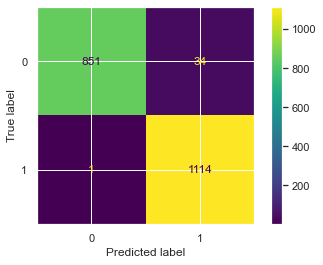

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 470049 ms
Naive Bayes accuracy score: 0.982500
Number of mislabeled points out of a total 2000 points in Naive Bayes: 35


In [153]:

# 4000 Unlearning Requests
Cnb_1 = CategoricalNB()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
unlearn_req = []
N,D = X_train_copy_1.shape
start = datetime.datetime.now()
for i in range(4000):
    delete_row = np.random.choice(range(N), replace=False)
    X_train_copy_1 = np.delete(X_train_copy_1, delete_row, axis=0)
    y_train_copy_1 = np.delete(y_train_copy_1, delete_row, axis=0)
    Cnb_1.partial_fit(X_train_copy_1, y_train_copy_1, classes=np.unique(y_train_copy_1))
    N-=1
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
new_data_80_x = X_train_copy_1
new_data_80_y = y_train_copy_1
y_pred = Cnb_1.predict(X_test_b)
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

### Experiment I. 1 Shard, 10 Slices

In [ ]:

sisa_1 = SISA(X_train_b, y_train_b, shards=1, slices=10, seed=123)
sisa_1.fit()
y_pred = sisa_1.predict(X_test_b, X_train_b, y_train_b)


Execution time for training Shard 0 : 498 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


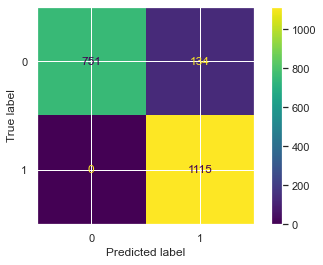

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       885
           1       0.89      1.00      0.94      1115

    accuracy                           0.93      2000
   macro avg       0.95      0.92      0.93      2000
weighted avg       0.94      0.93      0.93      2000

Naive Bayes accuracy score: 0.933000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 134


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

#### Experiment I. Unlearn Requests on 20% of dataset

In [ ]:
unlearn_rq_20 = sisa_1.gen_random_seq(1000)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_20, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_20, axis=0)
sisa_1.fit(unlearn_requests=unlearn_rq_20)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


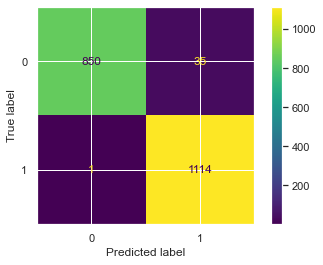

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.982000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 36


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()


#### Experiment I. Unlearn Requests on 40% of dataset

In [ ]:

unlearn_rq_40 = sisa_1.gen_random_seq(size=2000)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)
sisa_1.fit(unlearn_requests=unlearn_rq_40)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

#### Experiment I. Unlearn Requests on 60% of dataset

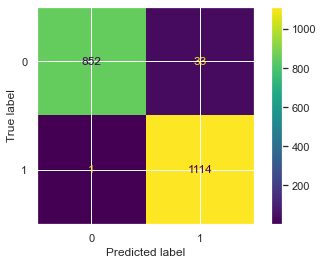

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 155
Naive Bayes accuracy score: 0.983000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 34


In [ ]:

unlearn_rq_60 = sisa_1.gen_random_seq(size=3000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_60, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_60, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

unlearn_rq_60 = sisa_1.gen_random_seq(size=3000)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_60, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_60, axis=0)
sisa_1.fit(unlearn_requests=unlearn_rq_60)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)



Execution time for training Shard 0 : 317 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


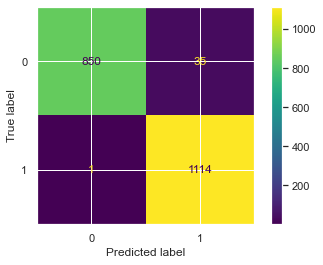

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.982000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 36


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

#### Experiment I. Unlearn Requests on 80% of dataset

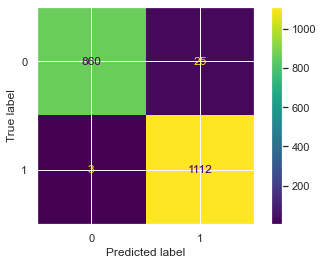

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       885
           1       0.98      1.00      0.99      1115

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Execution time: 126
Naive Bayes accuracy score: 0.986000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 28


In [ ]:

unlearn_rq_80 = sisa_1.gen_random_seq(size=4000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_80, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_80, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:
unlearn_rq_80 = sisa_1.gen_random_seq(size=4000)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_80, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_80, axis=0)
sisa_1.fit(unlearn_requests=unlearn_rq_80)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


Execution time for training Shard 0 : 498 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


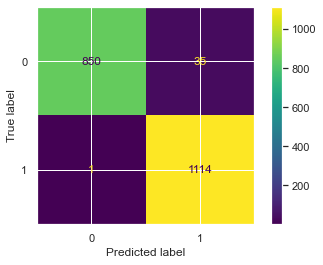

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.982000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 36


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

### Experiment II. 3 Shards, 10 Slices

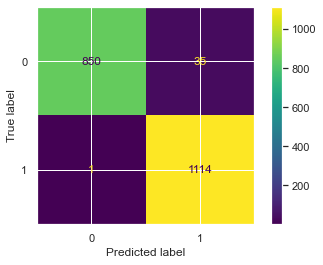

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 246 ms
Naive Bayes accuracy score: 0.982000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 36


In [ ]:
start = datetime.datetime.now()
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_b, y_train_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
y_pred = Cnb_1.predict(X_test_b)
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1 = SISA(X_train_b, y_train_b, shards=3, slices=10, seed=123)
sisa_1.fit()
y_pred = sisa_1.predict(X_test_b, X_train_b, y_train_b)


Execution time for training Shard 0 : 682 ms
Execution time for training Shard 1 : 914 ms
Execution time for training Shard 2 : 683 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


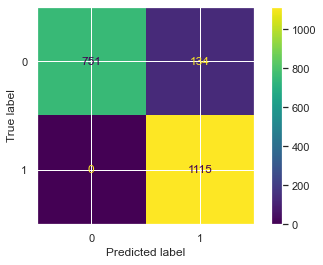

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       885
           1       0.89      1.00      0.94      1115

    accuracy                           0.93      2000
   macro avg       0.95      0.92      0.93      2000
weighted avg       0.94      0.93      0.93      2000

Naive Bayes accuracy score: 0.933000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 134


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

#### Experiment I. Unlearn Requests on 20% of dataset

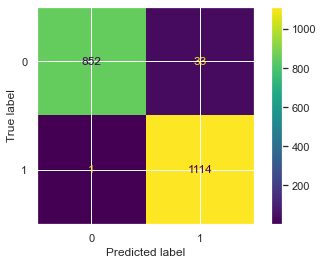

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 353
Naive Bayes accuracy score: 0.983000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 34


In [ ]:

unlearn_rq_20 = sisa_1.gen_random_seq(size=1000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_20, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_20, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:
sisa_1.fit(unlearn_requests=unlearn_rq_20)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)


Execution time for training Shard 0 : 300 ms
Execution time for training Shard 1 : 354 ms
Execution time for training Shard 2 : 263 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


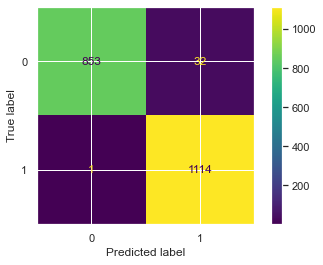

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.99      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.983500
Number of mislabeled points out of a total 2000 points in Naive Bayes: 33


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()


#### Experiment I. Unlearn Requests on 40% of dataset

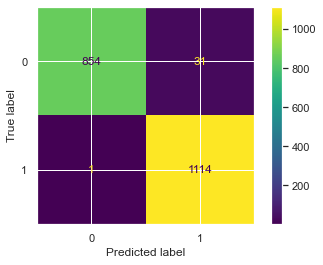

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.99      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 177 ms
Naive Bayes accuracy score: 0.984000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 32


In [ ]:
unlearn_rq_40 = sisa_1.gen_random_seq(size=2000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1.fit(unlearn_requests=unlearn_rq_40)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)


Execution time for training Shard 0 : 292 ms
Execution time for training Shard 1 : 473 ms
Execution time for training Shard 2 : 328 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


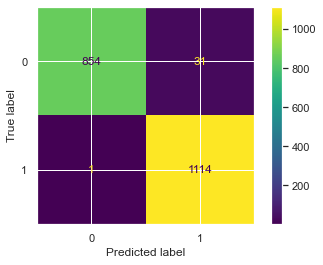

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.99      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.984000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 32


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

#### Experiment I. Unlearn Requests on 60% of dataset

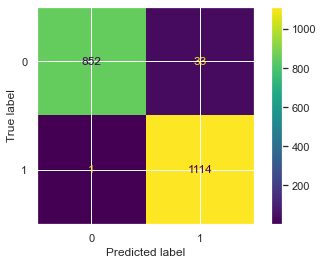

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 234
Naive Bayes accuracy score: 0.983000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 34


In [ ]:

unlearn_rq_60 = sisa_1.gen_random_seq(size=3000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_60, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_60, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1.fit(unlearn_requests=unlearn_rq_60)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)



/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)


Execution time for training Shard 0 : 336 ms
Execution time for training Shard 1 : 250 ms
Execution time for training Shard 2 : 264 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


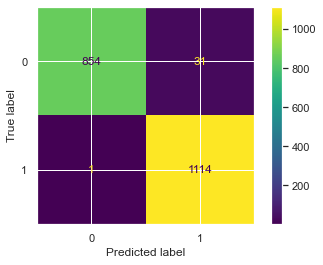

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.99      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.984000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 32


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

#### Experiment I. Unlearn Requests on 80% of dataset

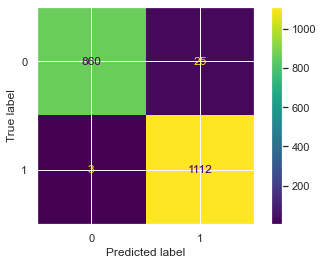

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       885
           1       0.98      1.00      0.99      1115

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Execution time: 121
Naive Bayes accuracy score: 0.986000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 28


In [ ]:

unlearn_rq_80 = sisa_1.gen_random_seq(size=4000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_80, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_80, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:
sisa_1.fit(unlearn_requests=unlearn_rq_80)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)


Execution time for training Shard 0 : 287 ms
Execution time for training Shard 1 : 288 ms
Execution time for training Shard 2 : 230 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


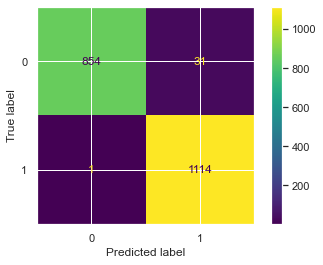

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.99      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.984000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 32


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

### Experiment III. 5 Shards, 10 Slices

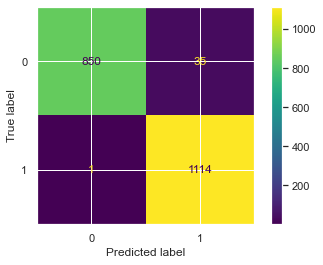

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 146 ms
Naive Bayes accuracy score: 0.982000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 36


In [ ]:
start = datetime.datetime.now()
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_b, y_train_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
y_pred = Cnb_1.predict(X_test_b)
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1 = SISA(X_train_b, y_train_b, shards=5, slices=10, seed=123)
sisa_1.fit()
y_pred = sisa_1.predict(X_test_b, X_train_b, y_train_b)


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 394 ms
Execution time for training Shard 1 : 388 ms
Execution time for training Shard 2 : 383 ms
Execution time for training Shard 3 : 442 ms
Execution time for training Shard 4 : 381 ms


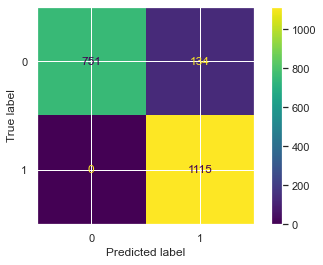

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       885
           1       0.89      1.00      0.94      1115

    accuracy                           0.93      2000
   macro avg       0.95      0.92      0.93      2000
weighted avg       0.94      0.93      0.93      2000

Naive Bayes accuracy score: 0.933000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 134


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

#### Experiment I. Unlearn Requests on 20% of dataset

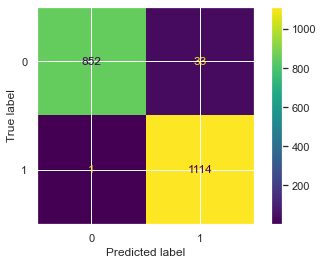

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 185
Naive Bayes accuracy score: 0.983000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 34


In [ ]:

unlearn_rq_20 = sisa_1.gen_random_seq(size=1000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_20, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_20, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:
sisa_1.fit(unlearn_requests=unlearn_rq_20)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


Execution time for training Shard 0 : 243 ms
Execution time for training Shard 1 : 241 ms
Execution time for training Shard 2 : 243 ms
Execution time for training Shard 3 : 245 ms
Execution time for training Shard 4 : 223 ms


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


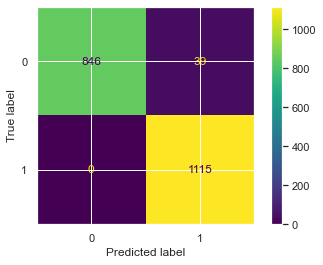

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.980500
Number of mislabeled points out of a total 2000 points in Naive Bayes: 39


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()


#### Experiment I. Unlearn Requests on 40% of dataset

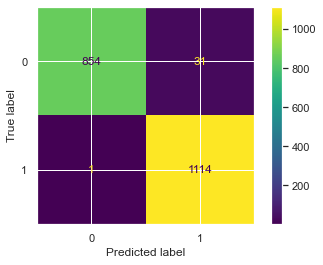

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.99      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 185 ms
Naive Bayes accuracy score: 0.984000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 32


In [ ]:
unlearn_rq_40 = sisa_1.gen_random_seq(size=2000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1.fit(unlearn_requests=unlearn_rq_40)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 220 ms
Execution time for training Shard 1 : 251 ms
Execution time for training Shard 2 : 246 ms
Execution time for training Shard 3 : 240 ms
Execution time for training Shard 4 : 246 ms


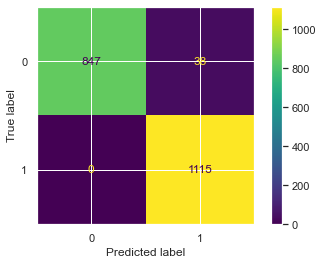

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.981000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 38


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

#### Experiment I. Unlearn Requests on 60% of dataset

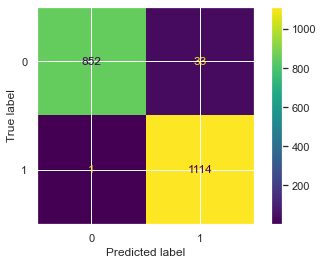

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 153
Naive Bayes accuracy score: 0.983000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 34


In [ ]:

unlearn_rq_60 = sisa_1.gen_random_seq(size=3000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_60, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_60, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1.fit(unlearn_requests=unlearn_rq_60)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)



/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 241 ms
Execution time for training Shard 1 : 245 ms
Execution time for training Shard 2 : 219 ms
Execution time for training Shard 3 : 246 ms
Execution time for training Shard 4 : 242 ms


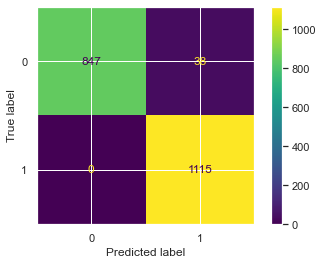

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.981000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 38


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

#### Experiment I. Unlearn Requests on 80% of dataset

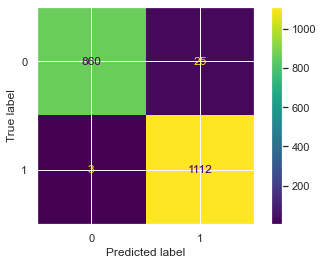

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       885
           1       0.98      1.00      0.99      1115

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Execution time: 119
Naive Bayes accuracy score: 0.986000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 28


In [ ]:

unlearn_rq_80 = sisa_1.gen_random_seq(size=4000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_80, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_80, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:
sisa_1.fit(unlearn_requests=unlearn_rq_80)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 262 ms
Execution time for training Shard 1 : 319 ms
Execution time for training Shard 2 : 336 ms
Execution time for training Shard 3 : 257 ms
Execution time for training Shard 4 : 252 ms


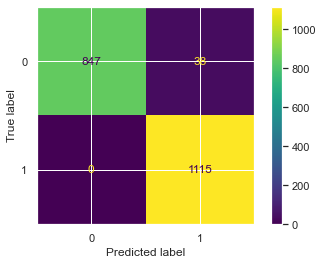

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.981000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 38


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

### Experiment IV. 7 Shards, 10 Slices

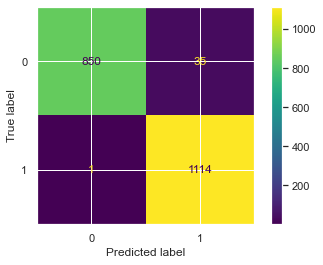

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 172 ms
Naive Bayes accuracy score: 0.982000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 36


In [ ]:
start = datetime.datetime.now()
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_b, y_train_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
y_pred = Cnb_1.predict(X_test_b)
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1 = SISA(X_train_b, y_train_b, shards=7, slices=10, seed=123)
sisa_1.fit()
y_pred = sisa_1.predict(X_test_b, X_train_b, y_train_b)


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 456 ms
Execution time for training Shard 1 : 439 ms
Execution time for training Shard 2 : 447 ms
Execution time for training Shard 3 : 493 ms
Execution time for training Shard 4 : 464 ms
Execution time for training Shard 5 : 460 ms
Execution time for training Shard 6 : 442 ms


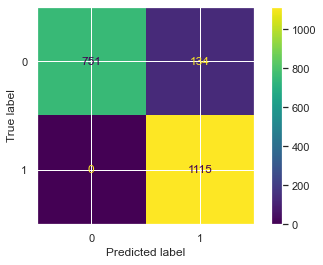

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       885
           1       0.89      1.00      0.94      1115

    accuracy                           0.93      2000
   macro avg       0.95      0.92      0.93      2000
weighted avg       0.94      0.93      0.93      2000

Naive Bayes accuracy score: 0.933000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 134


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

#### Experiment I. Unlearn Requests on 20% of dataset

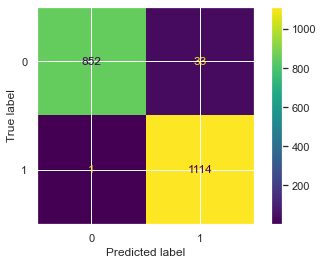

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 234
Naive Bayes accuracy score: 0.983000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 34


In [ ]:

unlearn_rq_20 = sisa_1.gen_random_seq(size=1000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_20, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_20, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:
sisa_1.fit(unlearn_requests=unlearn_rq_20)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)
/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 275 ms
Execution time for training Shard 1 : 260 ms
Execution time for training Shard 2 : 252 ms
Execution time for training Shard 3 : 256 ms
Execution time for training Shard 4 : 261 ms
Execution time for training Shard 5 : 226 ms
Execution time for training Shard 6 : 278 ms


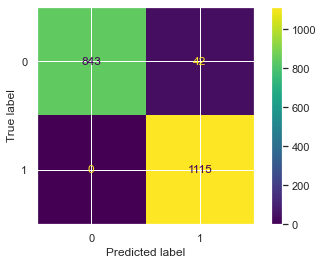

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       885
           1       0.96      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.979000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 42


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()


#### Experiment I. Unlearn Requests on 40% of dataset

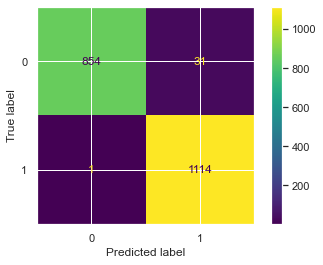

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.99      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 236 ms
Naive Bayes accuracy score: 0.984000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 32


In [ ]:
unlearn_rq_40 = sisa_1.gen_random_seq(size=2000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1.fit(unlearn_requests=unlearn_rq_40)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)
/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 233 ms
Execution time for training Shard 1 : 273 ms
Execution time for training Shard 2 : 406 ms
Execution time for training Shard 3 : 257 ms
Execution time for training Shard 4 : 283 ms
Execution time for training Shard 5 : 257 ms
Execution time for training Shard 6 : 258 ms


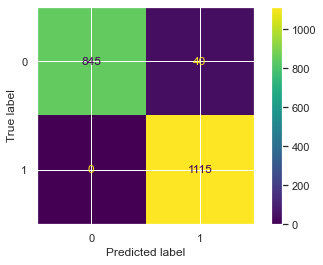

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.980000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 40


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

#### Experiment I. Unlearn Requests on 60% of dataset

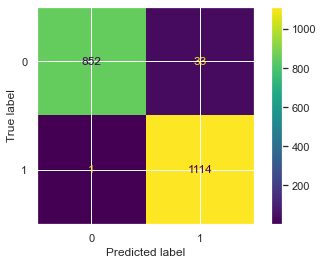

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 152
Naive Bayes accuracy score: 0.983000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 34


In [ ]:

unlearn_rq_60 = sisa_1.gen_random_seq(size=3000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_60, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_60, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1.fit(unlearn_requests=unlearn_rq_60)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)



/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)
/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 256 ms
Execution time for training Shard 1 : 254 ms
Execution time for training Shard 2 : 247 ms
Execution time for training Shard 3 : 262 ms
Execution time for training Shard 4 : 263 ms
Execution time for training Shard 5 : 265 ms
Execution time for training Shard 6 : 265 ms


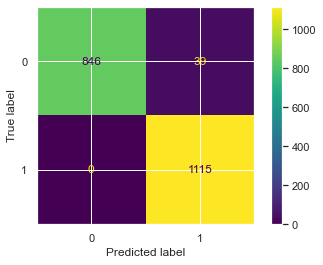

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.980500
Number of mislabeled points out of a total 2000 points in Naive Bayes: 39


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

#### Experiment I. Unlearn Requests on 80% of dataset

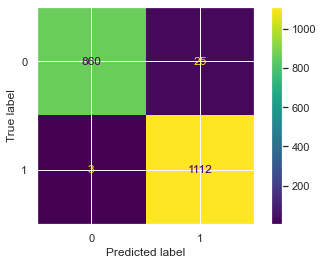

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       885
           1       0.98      1.00      0.99      1115

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Execution time: 160
Naive Bayes accuracy score: 0.986000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 28


In [ ]:

unlearn_rq_80 = sisa_1.gen_random_seq(size=4000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_80, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_80, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:
sisa_1.fit(unlearn_requests=unlearn_rq_80)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)
/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 260 ms
Execution time for training Shard 1 : 260 ms
Execution time for training Shard 2 : 262 ms
Execution time for training Shard 3 : 261 ms
Execution time for training Shard 4 : 262 ms
Execution time for training Shard 5 : 241 ms
Execution time for training Shard 6 : 304 ms


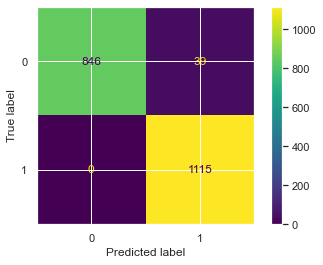

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.980500
Number of mislabeled points out of a total 2000 points in Naive Bayes: 39


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

### Experiment V. 9 Shards, 10 Slices

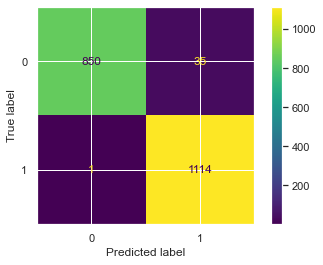

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 256 ms
Naive Bayes accuracy score: 0.982000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 36


In [ ]:
start = datetime.datetime.now()
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_b, y_train_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
y_pred = Cnb_1.predict(X_test_b)
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1 = SISA(X_train_b, y_train_b, shards=9, slices=10, seed=123)
sisa_1.fit()
y_pred = sisa_1.predict(X_test_b, X_train_b, y_train_b)


/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 475 ms
Execution time for training Shard 1 : 469 ms
Execution time for training Shard 2 : 508 ms
Execution time for training Shard 3 : 655 ms
Execution time for training Shard 4 : 498 ms
Execution time for training Shard 5 : 465 ms
Execution time for training Shard 6 : 447 ms
Execution time for training Shard 7 : 444 ms
Execution time for training Shard 8 : 457 ms


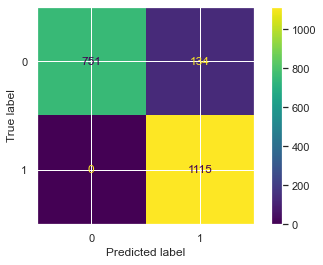

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       885
           1       0.89      1.00      0.94      1115

    accuracy                           0.93      2000
   macro avg       0.95      0.92      0.93      2000
weighted avg       0.94      0.93      0.93      2000

Naive Bayes accuracy score: 0.933000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 134


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

#### Experiment I. Unlearn Requests on 20% of dataset

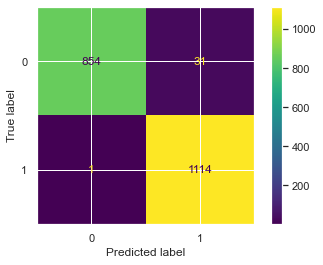

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.99      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 171 ms
Naive Bayes accuracy score: 0.984000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 32


In [ ]:
unlearn_rq_20 = sisa_1.gen_random_seq(size=1000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:
sisa_1.fit(unlearn_requests=unlearn_rq_20)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)
/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 237 ms
Execution time for training Shard 1 : 237 ms
Execution time for training Shard 2 : 239 ms
Execution time for training Shard 3 : 256 ms
Execution time for training Shard 4 : 253 ms
Execution time for training Shard 5 : 258 ms
Execution time for training Shard 6 : 238 ms
Execution time for training Shard 7 : 216 ms
Execution time for training Shard 8 : 236 ms


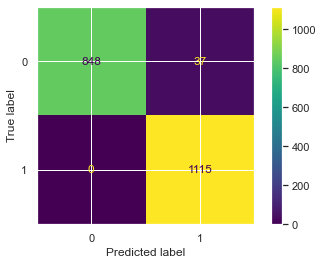

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.981500
Number of mislabeled points out of a total 2000 points in Naive Bayes: 37


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()


#### Experiment I. Unlearn Requests on 40% of dataset

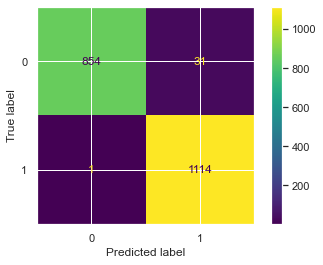

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.99      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 225 ms
Naive Bayes accuracy score: 0.984000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 32


In [ ]:
unlearn_rq_40 = sisa_1.gen_random_seq(size=2000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_40, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_40, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d ms" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1.fit(unlearn_requests=unlearn_rq_40)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)
/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 253 ms
Execution time for training Shard 1 : 379 ms
Execution time for training Shard 2 : 263 ms
Execution time for training Shard 3 : 241 ms
Execution time for training Shard 4 : 245 ms
Execution time for training Shard 5 : 266 ms
Execution time for training Shard 6 : 262 ms
Execution time for training Shard 7 : 245 ms
Execution time for training Shard 8 : 273 ms


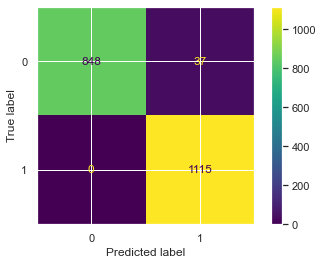

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.981500
Number of mislabeled points out of a total 2000 points in Naive Bayes: 37


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

#### Experiment I. Unlearn Requests on 60% of dataset

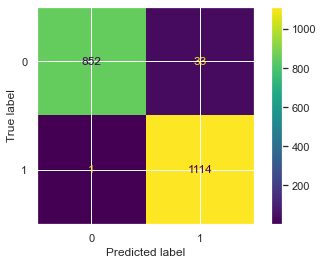

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Execution time: 148
Naive Bayes accuracy score: 0.983000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 34


In [ ]:

unlearn_rq_60 = sisa_1.gen_random_seq(size=3000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_60, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_60, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:

sisa_1.fit(unlearn_requests=unlearn_rq_60)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)



/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)
/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 320 ms
Execution time for training Shard 1 : 273 ms
Execution time for training Shard 2 : 251 ms
Execution time for training Shard 3 : 216 ms
Execution time for training Shard 4 : 294 ms
Execution time for training Shard 5 : 285 ms
Execution time for training Shard 6 : 247 ms
Execution time for training Shard 7 : 253 ms
Execution time for training Shard 8 : 241 ms


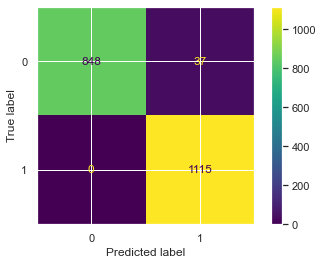

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.981500
Number of mislabeled points out of a total 2000 points in Naive Bayes: 37


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()

#### Experiment I. Unlearn Requests on 80% of dataset

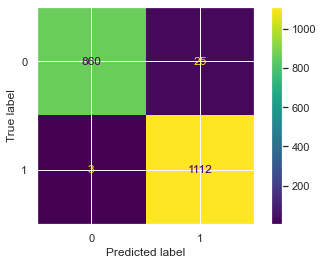

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       885
           1       0.98      1.00      0.99      1115

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Execution time: 152
Naive Bayes accuracy score: 0.986000
Number of mislabeled points out of a total 2000 points in Naive Bayes: 28


In [ ]:

unlearn_rq_80 = sisa_1.gen_random_seq(size=4000)
start = datetime.datetime.now()
X_train_copy_1 = np.copy(X_train_b)
y_train_copy_1 = np.copy(y_train_b)
X_train_copy = np.delete(X_train_copy_1, unlearn_rq_80, axis=0)
y_train_copy = np.delete(y_train_copy_1, unlearn_rq_80, axis=0)
Cnb_1 = CategoricalNB()
Cnb_1.fit(X_train_copy, y_train_copy)
y_pred = Cnb_1.predict(X_test_b)
end = datetime.datetime.now()
diff = (end -start)
execution_time = diff.total_seconds() * 1000
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Execution time: %d" %(execution_time))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))

In [ ]:
sisa_1.fit(unlearn_requests=unlearn_rq_80)
y_pred = sisa_1.predict(X_test_b, X_train_copy, y_train_copy)


/Users/micneely/Desktop/sisa/sisa.py:80: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  affected_shards_x = np.array(self.affected_shards)
/opt/anaconda3/lib/python3.8/site-packages/mlxtend/classifier/ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


Execution time for training Shard 0 : 275 ms
Execution time for training Shard 1 : 265 ms
Execution time for training Shard 2 : 266 ms
Execution time for training Shard 3 : 271 ms
Execution time for training Shard 4 : 276 ms
Execution time for training Shard 5 : 282 ms
Execution time for training Shard 6 : 260 ms
Execution time for training Shard 7 : 273 ms
Execution time for training Shard 8 : 237 ms


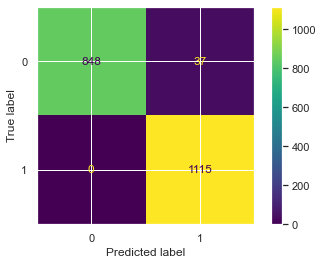

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       885
           1       0.97      1.00      0.98      1115

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Naive Bayes accuracy score: 0.981500
Number of mislabeled points out of a total 2000 points in Naive Bayes: 37


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred)
plt.show()
print(classification_report(y_test_b, y_pred))
print("Naive Bayes accuracy score: %f" % (accuracy_score(y_test_b, y_pred)))
print("Number of mislabeled points out of a total %d points in Naive Bayes: %d" % (X_test_b.shape[0], (y_test_b != y_pred).sum()))
sisa_1.reset_learners()